### Log Regression Model Tuning for 2016 - 2020 Data (imports)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import modelinghelper as helper

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import joblib
import os
from datetime import datetime

# supress future warnings
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [2]:
#set up random seed
rng = 42

# set up folder to save results
output_path = 'import_run8_SMOTEsampling_gridsearchCV'
dataset = 'import_SMOTE'

if not os.path.exists(output_path):
    os.makedirs(output_path)
else:
    print("Folder already exists")

# file name
prefix = f'{output_path}/{dataset}'

Folder already exists


In [3]:
# read in data
p = '../data/'
input_name = 'cleaned.csv'

df = pd.read_csv(f'{p}{input_name}')

In [4]:
df['ship_date_mm'] = df['ship_date_mm'].astype(str)

In [5]:
df.describe()

,control_number,qty,value,qty_new,ship_date_yyyy
count,1.890132e+06,1.890132e+06,1.890132e+06,1.890132e+06,1.890132e+06
mean,2.018142e+09,1.955213e+06,9.658016e+03,1.954949e+06,2.017558e+03
std,1.263350e+06,2.644078e+08,9.355053e+05,2.644078e+08,1.279415e+00
min,2.014539e+09,-1.000000e+00,0.000000e+00,-1.000000e+00,2.016000e+03
25%,2.016978e+09,1.500000e+00,5.100000e+01,1.000000e+00,2.016000e+03
50%,2.017984e+09,9.000000e+00,3.180000e+02,8.000000e+00,2.017000e+03
75%,2.019505e+09,9.300000e+01,2.104000e+03,8.600000e+01,2.019000e+03
max,2.020755e+09,9.990708e+10,1.242236e+09,9.990708e+10,2.020000e+03


In [6]:
non_feature_cols = ['control_number', 'disp_date', 'i_e', 'ship_date', 
                    'cartons', 'qty', 'unit', 'specific_generic_name',
                    'genus', 'species', 'wildlf_cat', 
                    'disp_date_yyyy', 'disp_date_mm', 'disp_ship_date']

target = ['act', 'dp_cd']

feature_cols = ['species_code', 'wildlf_desc', 'wildlf_cat',
                'ctry_org', 'ctry_ie','purp', 'src', 'trans_mode', 'pt_cd', 
                 'value', 'ship_date_mm']

import_df = helper.df_filtering(df, i_e = 'I', f_cols = feature_cols)
# import: 590505 rows × 11 columns
# export: 299340 rows × 11 columns

#### Modeling Pipeline

In [7]:
X_train, X_test, y_train, y_test = helper.data_split(import_df)

#### Log Regression

In [8]:
clf = LogisticRegression(random_state=rng)
lr_params={
    'clf__class_weight':[None,
                         'balanced', 
                         #{0:100, 1:1}, 
                         {0:50, 1:1}],
    'clf__solver': ['lbfgs', 'liblinear', 'sag', 'saga'],
    'clf__C': [0.1, 0.5, 1, 5, 10, 50, 100]
}

%time lr_pipe = helper.gridsearch_pipeline(X_train, y_train, clf, lr_params, imbalance_pipe=True) 
lr_pipe

Fitting 5 folds for each of 84 candidates, totalling 420 fits
[CV 1/5] END clf__C=0.1, clf__class_weight=None, clf__solver=lbfgs;, score=0.761 total time=  12.0s
[CV 2/5] END clf__C=0.1, clf__class_weight=None, clf__solver=lbfgs;, score=0.765 total time=  11.8s
[CV 3/5] END clf__C=0.1, clf__class_weight=None, clf__solver=lbfgs;, score=0.756 total time=  11.4s
[CV 4/5] END clf__C=0.1, clf__class_weight=None, clf__solver=lbfgs;, score=0.753 total time=  11.5s
[CV 5/5] END clf__C=0.1, clf__class_weight=None, clf__solver=lbfgs;, score=0.750 total time=  12.0s
[CV 1/5] END clf__C=0.1, clf__class_weight=None, clf__solver=liblinear;, score=0.761 total time=  12.2s
[CV 2/5] END clf__C=0.1, clf__class_weight=None, clf__solver=liblinear;, score=0.765 total time=  12.1s
[CV 3/5] END clf__C=0.1, clf__class_weight=None, clf__solver=liblinear;, score=0.756 total time=  12.0s
[CV 4/5] END clf__C=0.1, clf__class_weight=None, clf__solver=liblinear;, score=0.753 total time=  12.0s
[CV 5/5] END clf__C=0.

/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=0.1, clf__class_weight=None, clf__solver=sag;, score=0.754 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=0.1, clf__class_weight=None, clf__solver=sag;, score=0.757 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END clf__C=0.1, clf__class_weight=None, clf__solver=sag;, score=0.756 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=0.1, clf__class_weight=None, clf__solver=sag;, score=0.745 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=0.1, clf__class_weight=None, clf__solver=sag;, score=0.743 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=0.1, clf__class_weight=None, clf__solver=saga;, score=0.752 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=0.1, clf__class_weight=None, clf__solver=saga;, score=0.751 total time= 2.2min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END clf__C=0.1, clf__class_weight=None, clf__solver=saga;, score=0.754 total time= 2.5min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=0.1, clf__class_weight=None, clf__solver=saga;, score=0.742 total time= 7.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=0.1, clf__class_weight=None, clf__solver=saga;, score=0.738 total time= 1.9min
[CV 1/5] END clf__C=0.1, clf__class_weight=balanced, clf__solver=lbfgs;, score=0.761 total time=  38.7s
[CV 2/5] END clf__C=0.1, clf__class_weight=balanced, clf__solver=lbfgs;, score=0.765 total time=  19.5s
[CV 3/5] END clf__C=0.1, clf__class_weight=balanced, clf__solver=lbfgs;, score=0.756 total time=  21.4s
[CV 4/5] END clf__C=0.1, clf__class_weight=balanced, clf__solver=lbfgs;, score=0.753 total time= 5.2min
[CV 5/5] END clf__C=0.1, clf__class_weight=balanced, clf__solver=lbfgs;, score=0.750 total time=  12.2s
[CV 1/5] END clf__C=0.1, clf__class_weight=balanced, clf__solver=liblinear;, score=0.761 total time=  11.6s
[CV 2/5] END clf__C=0.1, clf__class_weight=balanced, clf__solver=liblinear;, score=0.765 total time=  11.9s
[CV 3/5] END clf__C=0.1, clf__class_weight=balanced, clf__solver=liblinear;, score=0.756 total time=  11.5s
[CV 4/5] END clf__C=0.1, clf__class_weight=balanced, clf_

/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=0.1, clf__class_weight=balanced, clf__solver=sag;, score=0.754 total time= 6.6min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=0.1, clf__class_weight=balanced, clf__solver=sag;, score=0.757 total time= 2.0min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END clf__C=0.1, clf__class_weight=balanced, clf__solver=sag;, score=0.756 total time= 1.6min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=0.1, clf__class_weight=balanced, clf__solver=sag;, score=0.745 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=0.1, clf__class_weight=balanced, clf__solver=sag;, score=0.743 total time= 1.8min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=0.1, clf__class_weight=balanced, clf__solver=saga;, score=0.752 total time= 2.1min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=0.1, clf__class_weight=balanced, clf__solver=saga;, score=0.751 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END clf__C=0.1, clf__class_weight=balanced, clf__solver=saga;, score=0.754 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=0.1, clf__class_weight=balanced, clf__solver=saga;, score=0.742 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=0.1, clf__class_weight=balanced, clf__solver=saga;, score=0.738 total time= 1.7min
[CV 1/5] END clf__C=0.1, clf__class_weight={0: 50, 1: 1}, clf__solver=lbfgs;, score=0.469 total time=  11.3s
[CV 2/5] END clf__C=0.1, clf__class_weight={0: 50, 1: 1}, clf__solver=lbfgs;, score=0.485 total time=  11.2s
[CV 3/5] END clf__C=0.1, clf__class_weight={0: 50, 1: 1}, clf__solver=lbfgs;, score=0.460 total time=  10.9s
[CV 4/5] END clf__C=0.1, clf__class_weight={0: 50, 1: 1}, clf__solver=lbfgs;, score=0.467 total time=  10.9s
[CV 5/5] END clf__C=0.1, clf__class_weight={0: 50, 1: 1}, clf__solver=lbfgs;, score=0.456 total time=  11.6s
[CV 1/5] END clf__C=0.1, clf__class_weight={0: 50, 1: 1}, clf__solver=liblinear;, score=0.469 total time=  12.4s
[CV 2/5] END clf__C=0.1, clf__class_weight={0: 50, 1: 1}, clf__solver=liblinear;, score=0.484 total time=  11.9s
[CV 3/5] END clf__C=0.1, clf__class_weight={0: 50, 1: 1}, clf__solver=liblinear;, score=0.461 total time=  11.1s
[CV 4/5] END 

/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=0.1, clf__class_weight={0: 50, 1: 1}, clf__solver=sag;, score=0.467 total time= 1.6min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=0.1, clf__class_weight={0: 50, 1: 1}, clf__solver=sag;, score=0.484 total time= 1.6min
[CV 3/5] END clf__C=0.1, clf__class_weight={0: 50, 1: 1}, clf__solver=sag;, score=0.460 total time=  26.2s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=0.1, clf__class_weight={0: 50, 1: 1}, clf__solver=sag;, score=0.467 total time= 1.6min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=0.1, clf__class_weight={0: 50, 1: 1}, clf__solver=sag;, score=0.455 total time= 1.6min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=0.1, clf__class_weight={0: 50, 1: 1}, clf__solver=saga;, score=0.467 total time= 1.6min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=0.1, clf__class_weight={0: 50, 1: 1}, clf__solver=saga;, score=0.483 total time= 1.6min
[CV 3/5] END clf__C=0.1, clf__class_weight={0: 50, 1: 1}, clf__solver=saga;, score=0.460 total time=  52.3s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=0.1, clf__class_weight={0: 50, 1: 1}, clf__solver=saga;, score=0.466 total time= 1.6min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=0.1, clf__class_weight={0: 50, 1: 1}, clf__solver=saga;, score=0.455 total time= 1.5min
[CV 1/5] END clf__C=0.5, clf__class_weight=None, clf__solver=lbfgs;, score=0.761 total time=  11.5s
[CV 2/5] END clf__C=0.5, clf__class_weight=None, clf__solver=lbfgs;, score=0.765 total time=  11.7s
[CV 3/5] END clf__C=0.5, clf__class_weight=None, clf__solver=lbfgs;, score=0.756 total time=  10.8s
[CV 4/5] END clf__C=0.5, clf__class_weight=None, clf__solver=lbfgs;, score=0.753 total time=  11.0s
[CV 5/5] END clf__C=0.5, clf__class_weight=None, clf__solver=lbfgs;, score=0.750 total time=  11.3s
[CV 1/5] END clf__C=0.5, clf__class_weight=None, clf__solver=liblinear;, score=0.761 total time=  11.4s
[CV 2/5] END clf__C=0.5, clf__class_weight=None, clf__solver=liblinear;, score=0.765 total time=  11.3s
[CV 3/5] END clf__C=0.5, clf__class_weight=None, clf__solver=liblinear;, score=0.756 total time=  11.1s
[CV 4/5] END clf__C=0.5, clf__class_weight=None, clf__solver=liblinear;, score=0

/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=0.5, clf__class_weight=None, clf__solver=sag;, score=0.754 total time= 1.8min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=0.5, clf__class_weight=None, clf__solver=sag;, score=0.757 total time= 1.6min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END clf__C=0.5, clf__class_weight=None, clf__solver=sag;, score=0.756 total time= 1.6min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=0.5, clf__class_weight=None, clf__solver=sag;, score=0.745 total time= 1.6min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=0.5, clf__class_weight=None, clf__solver=sag;, score=0.743 total time= 1.6min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=0.5, clf__class_weight=None, clf__solver=saga;, score=0.752 total time= 1.6min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=0.5, clf__class_weight=None, clf__solver=saga;, score=0.751 total time= 1.6min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END clf__C=0.5, clf__class_weight=None, clf__solver=saga;, score=0.754 total time= 1.6min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=0.5, clf__class_weight=None, clf__solver=saga;, score=0.742 total time= 1.6min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=0.5, clf__class_weight=None, clf__solver=saga;, score=0.738 total time= 1.6min
[CV 1/5] END clf__C=0.5, clf__class_weight=balanced, clf__solver=lbfgs;, score=0.761 total time=  12.0s
[CV 2/5] END clf__C=0.5, clf__class_weight=balanced, clf__solver=lbfgs;, score=0.765 total time=  11.6s
[CV 3/5] END clf__C=0.5, clf__class_weight=balanced, clf__solver=lbfgs;, score=0.756 total time=  11.5s
[CV 4/5] END clf__C=0.5, clf__class_weight=balanced, clf__solver=lbfgs;, score=0.753 total time=  11.5s
[CV 5/5] END clf__C=0.5, clf__class_weight=balanced, clf__solver=lbfgs;, score=0.750 total time=  12.1s
[CV 1/5] END clf__C=0.5, clf__class_weight=balanced, clf__solver=liblinear;, score=0.761 total time=  11.7s
[CV 2/5] END clf__C=0.5, clf__class_weight=balanced, clf__solver=liblinear;, score=0.765 total time=  11.7s
[CV 3/5] END clf__C=0.5, clf__class_weight=balanced, clf__solver=liblinear;, score=0.756 total time=  12.1s
[CV 4/5] END clf__C=0.5, clf__class_weight=balanced, clf_

/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=0.5, clf__class_weight=balanced, clf__solver=sag;, score=0.754 total time= 1.6min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=0.5, clf__class_weight=balanced, clf__solver=sag;, score=0.757 total time= 1.6min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END clf__C=0.5, clf__class_weight=balanced, clf__solver=sag;, score=0.756 total time= 1.6min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=0.5, clf__class_weight=balanced, clf__solver=sag;, score=0.745 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=0.5, clf__class_weight=balanced, clf__solver=sag;, score=0.743 total time= 1.6min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=0.5, clf__class_weight=balanced, clf__solver=saga;, score=0.752 total time= 1.6min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=0.5, clf__class_weight=balanced, clf__solver=saga;, score=0.751 total time= 1.6min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END clf__C=0.5, clf__class_weight=balanced, clf__solver=saga;, score=0.754 total time= 1.6min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=0.5, clf__class_weight=balanced, clf__solver=saga;, score=0.742 total time= 1.6min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=0.5, clf__class_weight=balanced, clf__solver=saga;, score=0.738 total time= 1.6min
[CV 1/5] END clf__C=0.5, clf__class_weight={0: 50, 1: 1}, clf__solver=lbfgs;, score=0.469 total time=  11.1s
[CV 2/5] END clf__C=0.5, clf__class_weight={0: 50, 1: 1}, clf__solver=lbfgs;, score=0.485 total time=  11.0s
[CV 3/5] END clf__C=0.5, clf__class_weight={0: 50, 1: 1}, clf__solver=lbfgs;, score=0.460 total time=  11.0s
[CV 4/5] END clf__C=0.5, clf__class_weight={0: 50, 1: 1}, clf__solver=lbfgs;, score=0.467 total time=  10.9s
[CV 5/5] END clf__C=0.5, clf__class_weight={0: 50, 1: 1}, clf__solver=lbfgs;, score=0.456 total time=  10.8s
[CV 1/5] END clf__C=0.5, clf__class_weight={0: 50, 1: 1}, clf__solver=liblinear;, score=0.469 total time=  11.5s
[CV 2/5] END clf__C=0.5, clf__class_weight={0: 50, 1: 1}, clf__solver=liblinear;, score=0.484 total time=  11.4s
[CV 3/5] END clf__C=0.5, clf__class_weight={0: 50, 1: 1}, clf__solver=liblinear;, score=0.461 total time=  11.1s
[CV 4/5] END 

/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=0.5, clf__class_weight={0: 50, 1: 1}, clf__solver=sag;, score=0.467 total time= 1.6min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=0.5, clf__class_weight={0: 50, 1: 1}, clf__solver=sag;, score=0.484 total time= 1.6min
[CV 3/5] END clf__C=0.5, clf__class_weight={0: 50, 1: 1}, clf__solver=sag;, score=0.460 total time=  25.7s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=0.5, clf__class_weight={0: 50, 1: 1}, clf__solver=sag;, score=0.467 total time= 1.6min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=0.5, clf__class_weight={0: 50, 1: 1}, clf__solver=sag;, score=0.455 total time= 1.6min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=0.5, clf__class_weight={0: 50, 1: 1}, clf__solver=saga;, score=0.467 total time= 1.6min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=0.5, clf__class_weight={0: 50, 1: 1}, clf__solver=saga;, score=0.483 total time= 1.6min
[CV 3/5] END clf__C=0.5, clf__class_weight={0: 50, 1: 1}, clf__solver=saga;, score=0.460 total time=  51.1s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=0.5, clf__class_weight={0: 50, 1: 1}, clf__solver=saga;, score=0.466 total time= 1.6min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=0.5, clf__class_weight={0: 50, 1: 1}, clf__solver=saga;, score=0.455 total time= 1.5min
[CV 1/5] END clf__C=1, clf__class_weight=None, clf__solver=lbfgs;, score=0.761 total time=  11.2s
[CV 2/5] END clf__C=1, clf__class_weight=None, clf__solver=lbfgs;, score=0.765 total time=  11.3s
[CV 3/5] END clf__C=1, clf__class_weight=None, clf__solver=lbfgs;, score=0.756 total time=  10.8s
[CV 4/5] END clf__C=1, clf__class_weight=None, clf__solver=lbfgs;, score=0.753 total time=  10.9s
[CV 5/5] END clf__C=1, clf__class_weight=None, clf__solver=lbfgs;, score=0.750 total time=  11.6s
[CV 1/5] END clf__C=1, clf__class_weight=None, clf__solver=liblinear;, score=0.761 total time=  11.6s
[CV 2/5] END clf__C=1, clf__class_weight=None, clf__solver=liblinear;, score=0.765 total time=  11.5s
[CV 3/5] END clf__C=1, clf__class_weight=None, clf__solver=liblinear;, score=0.756 total time=  11.8s
[CV 4/5] END clf__C=1, clf__class_weight=None, clf__solver=liblinear;, score=0.753 total time=  

/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=1, clf__class_weight=None, clf__solver=sag;, score=0.754 total time= 1.6min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=1, clf__class_weight=None, clf__solver=sag;, score=0.757 total time= 1.6min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END clf__C=1, clf__class_weight=None, clf__solver=sag;, score=0.756 total time= 1.6min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=1, clf__class_weight=None, clf__solver=sag;, score=0.745 total time= 1.6min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=1, clf__class_weight=None, clf__solver=sag;, score=0.743 total time= 1.6min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=1, clf__class_weight=None, clf__solver=saga;, score=0.752 total time= 1.6min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=1, clf__class_weight=None, clf__solver=saga;, score=0.751 total time= 1.6min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END clf__C=1, clf__class_weight=None, clf__solver=saga;, score=0.754 total time= 1.6min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=1, clf__class_weight=None, clf__solver=saga;, score=0.742 total time= 1.6min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=1, clf__class_weight=None, clf__solver=saga;, score=0.738 total time= 1.6min
[CV 1/5] END clf__C=1, clf__class_weight=balanced, clf__solver=lbfgs;, score=0.761 total time=  11.5s
[CV 2/5] END clf__C=1, clf__class_weight=balanced, clf__solver=lbfgs;, score=0.765 total time=  11.6s
[CV 3/5] END clf__C=1, clf__class_weight=balanced, clf__solver=lbfgs;, score=0.756 total time=  11.1s
[CV 4/5] END clf__C=1, clf__class_weight=balanced, clf__solver=lbfgs;, score=0.753 total time=  11.3s
[CV 5/5] END clf__C=1, clf__class_weight=balanced, clf__solver=lbfgs;, score=0.750 total time=  11.7s
[CV 1/5] END clf__C=1, clf__class_weight=balanced, clf__solver=liblinear;, score=0.761 total time=  11.4s
[CV 2/5] END clf__C=1, clf__class_weight=balanced, clf__solver=liblinear;, score=0.765 total time=  11.6s
[CV 3/5] END clf__C=1, clf__class_weight=balanced, clf__solver=liblinear;, score=0.756 total time=  11.8s
[CV 4/5] END clf__C=1, clf__class_weight=balanced, clf__solver=liblinear;, 

/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=1, clf__class_weight=balanced, clf__solver=sag;, score=0.754 total time= 1.6min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=1, clf__class_weight=balanced, clf__solver=sag;, score=0.757 total time= 1.6min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END clf__C=1, clf__class_weight=balanced, clf__solver=sag;, score=0.756 total time= 1.6min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=1, clf__class_weight=balanced, clf__solver=sag;, score=0.745 total time= 1.6min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=1, clf__class_weight=balanced, clf__solver=sag;, score=0.743 total time= 1.6min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=1, clf__class_weight=balanced, clf__solver=saga;, score=0.752 total time= 1.6min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=1, clf__class_weight=balanced, clf__solver=saga;, score=0.751 total time= 1.6min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END clf__C=1, clf__class_weight=balanced, clf__solver=saga;, score=0.754 total time= 1.6min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=1, clf__class_weight=balanced, clf__solver=saga;, score=0.742 total time= 1.6min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=1, clf__class_weight=balanced, clf__solver=saga;, score=0.738 total time= 1.5min
[CV 1/5] END clf__C=1, clf__class_weight={0: 50, 1: 1}, clf__solver=lbfgs;, score=0.469 total time=  10.9s
[CV 2/5] END clf__C=1, clf__class_weight={0: 50, 1: 1}, clf__solver=lbfgs;, score=0.485 total time=  10.6s
[CV 3/5] END clf__C=1, clf__class_weight={0: 50, 1: 1}, clf__solver=lbfgs;, score=0.460 total time=  10.6s
[CV 4/5] END clf__C=1, clf__class_weight={0: 50, 1: 1}, clf__solver=lbfgs;, score=0.467 total time=  10.7s
[CV 5/5] END clf__C=1, clf__class_weight={0: 50, 1: 1}, clf__solver=lbfgs;, score=0.456 total time=  10.6s
[CV 1/5] END clf__C=1, clf__class_weight={0: 50, 1: 1}, clf__solver=liblinear;, score=0.469 total time=  11.1s
[CV 2/5] END clf__C=1, clf__class_weight={0: 50, 1: 1}, clf__solver=liblinear;, score=0.484 total time=  11.2s
[CV 3/5] END clf__C=1, clf__class_weight={0: 50, 1: 1}, clf__solver=liblinear;, score=0.461 total time=  10.5s
[CV 4/5] END clf__C=1, clf__cla

/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=1, clf__class_weight={0: 50, 1: 1}, clf__solver=sag;, score=0.467 total time= 1.6min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=1, clf__class_weight={0: 50, 1: 1}, clf__solver=sag;, score=0.484 total time= 1.6min
[CV 3/5] END clf__C=1, clf__class_weight={0: 50, 1: 1}, clf__solver=sag;, score=0.460 total time=  25.5s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=1, clf__class_weight={0: 50, 1: 1}, clf__solver=sag;, score=0.467 total time= 1.6min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=1, clf__class_weight={0: 50, 1: 1}, clf__solver=sag;, score=0.455 total time= 3.2min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=1, clf__class_weight={0: 50, 1: 1}, clf__solver=saga;, score=0.467 total time=13.8min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=1, clf__class_weight={0: 50, 1: 1}, clf__solver=saga;, score=0.483 total time= 1.5min
[CV 3/5] END clf__C=1, clf__class_weight={0: 50, 1: 1}, clf__solver=saga;, score=0.460 total time=  48.6s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=1, clf__class_weight={0: 50, 1: 1}, clf__solver=saga;, score=0.466 total time= 1.6min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=1, clf__class_weight={0: 50, 1: 1}, clf__solver=saga;, score=0.455 total time= 1.7min
[CV 1/5] END clf__C=5, clf__class_weight=None, clf__solver=lbfgs;, score=0.761 total time=  12.0s
[CV 2/5] END clf__C=5, clf__class_weight=None, clf__solver=lbfgs;, score=0.765 total time=  11.7s
[CV 3/5] END clf__C=5, clf__class_weight=None, clf__solver=lbfgs;, score=0.756 total time=  11.2s
[CV 4/5] END clf__C=5, clf__class_weight=None, clf__solver=lbfgs;, score=0.753 total time=  11.5s
[CV 5/5] END clf__C=5, clf__class_weight=None, clf__solver=lbfgs;, score=0.750 total time=  12.9s
[CV 1/5] END clf__C=5, clf__class_weight=None, clf__solver=liblinear;, score=0.761 total time=  12.3s
[CV 2/5] END clf__C=5, clf__class_weight=None, clf__solver=liblinear;, score=0.765 total time=  12.0s
[CV 3/5] END clf__C=5, clf__class_weight=None, clf__solver=liblinear;, score=0.756 total time=  11.9s
[CV 4/5] END clf__C=5, clf__class_weight=None, clf__solver=liblinear;, score=0.753 total time=  11

/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=5, clf__class_weight=None, clf__solver=sag;, score=0.754 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=5, clf__class_weight=None, clf__solver=sag;, score=0.757 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END clf__C=5, clf__class_weight=None, clf__solver=sag;, score=0.756 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=5, clf__class_weight=None, clf__solver=sag;, score=0.745 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=5, clf__class_weight=None, clf__solver=sag;, score=0.743 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=5, clf__class_weight=None, clf__solver=saga;, score=0.752 total time= 1.8min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=5, clf__class_weight=None, clf__solver=saga;, score=0.751 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END clf__C=5, clf__class_weight=None, clf__solver=saga;, score=0.754 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=5, clf__class_weight=None, clf__solver=saga;, score=0.742 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=5, clf__class_weight=None, clf__solver=saga;, score=0.738 total time= 1.7min
[CV 1/5] END clf__C=5, clf__class_weight=balanced, clf__solver=lbfgs;, score=0.761 total time=  12.1s
[CV 2/5] END clf__C=5, clf__class_weight=balanced, clf__solver=lbfgs;, score=0.765 total time=  12.1s
[CV 3/5] END clf__C=5, clf__class_weight=balanced, clf__solver=lbfgs;, score=0.756 total time=  11.6s
[CV 4/5] END clf__C=5, clf__class_weight=balanced, clf__solver=lbfgs;, score=0.753 total time=  12.0s
[CV 5/5] END clf__C=5, clf__class_weight=balanced, clf__solver=lbfgs;, score=0.750 total time=  12.4s
[CV 1/5] END clf__C=5, clf__class_weight=balanced, clf__solver=liblinear;, score=0.761 total time=  12.0s
[CV 2/5] END clf__C=5, clf__class_weight=balanced, clf__solver=liblinear;, score=0.765 total time=  12.7s
[CV 3/5] END clf__C=5, clf__class_weight=balanced, clf__solver=liblinear;, score=0.756 total time=  12.0s
[CV 4/5] END clf__C=5, clf__class_weight=balanced, clf__solver=liblinear;, 

/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=5, clf__class_weight=balanced, clf__solver=sag;, score=0.754 total time= 1.8min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=5, clf__class_weight=balanced, clf__solver=sag;, score=0.757 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END clf__C=5, clf__class_weight=balanced, clf__solver=sag;, score=0.756 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=5, clf__class_weight=balanced, clf__solver=sag;, score=0.745 total time= 1.8min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=5, clf__class_weight=balanced, clf__solver=sag;, score=0.743 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=5, clf__class_weight=balanced, clf__solver=saga;, score=0.752 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=5, clf__class_weight=balanced, clf__solver=saga;, score=0.751 total time= 1.8min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END clf__C=5, clf__class_weight=balanced, clf__solver=saga;, score=0.754 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=5, clf__class_weight=balanced, clf__solver=saga;, score=0.742 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=5, clf__class_weight=balanced, clf__solver=saga;, score=0.738 total time= 1.7min
[CV 1/5] END clf__C=5, clf__class_weight={0: 50, 1: 1}, clf__solver=lbfgs;, score=0.469 total time=  11.8s
[CV 2/5] END clf__C=5, clf__class_weight={0: 50, 1: 1}, clf__solver=lbfgs;, score=0.485 total time=  11.2s
[CV 3/5] END clf__C=5, clf__class_weight={0: 50, 1: 1}, clf__solver=lbfgs;, score=0.460 total time=  11.1s
[CV 4/5] END clf__C=5, clf__class_weight={0: 50, 1: 1}, clf__solver=lbfgs;, score=0.467 total time=  11.1s
[CV 5/5] END clf__C=5, clf__class_weight={0: 50, 1: 1}, clf__solver=lbfgs;, score=0.456 total time=  11.3s
[CV 1/5] END clf__C=5, clf__class_weight={0: 50, 1: 1}, clf__solver=liblinear;, score=0.469 total time=  11.9s
[CV 2/5] END clf__C=5, clf__class_weight={0: 50, 1: 1}, clf__solver=liblinear;, score=0.484 total time=  11.6s
[CV 3/5] END clf__C=5, clf__class_weight={0: 50, 1: 1}, clf__solver=liblinear;, score=0.461 total time=  11.2s
[CV 4/5] END clf__C=5, clf__cla

/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=5, clf__class_weight={0: 50, 1: 1}, clf__solver=sag;, score=0.467 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=5, clf__class_weight={0: 50, 1: 1}, clf__solver=sag;, score=0.484 total time= 1.7min
[CV 3/5] END clf__C=5, clf__class_weight={0: 50, 1: 1}, clf__solver=sag;, score=0.460 total time=  27.9s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=5, clf__class_weight={0: 50, 1: 1}, clf__solver=sag;, score=0.467 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=5, clf__class_weight={0: 50, 1: 1}, clf__solver=sag;, score=0.455 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=5, clf__class_weight={0: 50, 1: 1}, clf__solver=saga;, score=0.467 total time= 1.8min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=5, clf__class_weight={0: 50, 1: 1}, clf__solver=saga;, score=0.483 total time= 1.7min
[CV 3/5] END clf__C=5, clf__class_weight={0: 50, 1: 1}, clf__solver=saga;, score=0.460 total time=  57.5s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=5, clf__class_weight={0: 50, 1: 1}, clf__solver=saga;, score=0.466 total time= 1.8min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=5, clf__class_weight={0: 50, 1: 1}, clf__solver=saga;, score=0.455 total time= 1.8min
[CV 1/5] END clf__C=10, clf__class_weight=None, clf__solver=lbfgs;, score=0.761 total time=  12.4s
[CV 2/5] END clf__C=10, clf__class_weight=None, clf__solver=lbfgs;, score=0.765 total time=  12.4s
[CV 3/5] END clf__C=10, clf__class_weight=None, clf__solver=lbfgs;, score=0.756 total time=  12.6s
[CV 4/5] END clf__C=10, clf__class_weight=None, clf__solver=lbfgs;, score=0.753 total time=  12.0s
[CV 5/5] END clf__C=10, clf__class_weight=None, clf__solver=lbfgs;, score=0.750 total time=  12.6s
[CV 1/5] END clf__C=10, clf__class_weight=None, clf__solver=liblinear;, score=0.761 total time=  12.4s
[CV 2/5] END clf__C=10, clf__class_weight=None, clf__solver=liblinear;, score=0.765 total time=  12.0s
[CV 3/5] END clf__C=10, clf__class_weight=None, clf__solver=liblinear;, score=0.756 total time=  12.3s
[CV 4/5] END clf__C=10, clf__class_weight=None, clf__solver=liblinear;, score=0.753 total 

/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=10, clf__class_weight=None, clf__solver=sag;, score=0.754 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=10, clf__class_weight=None, clf__solver=sag;, score=0.757 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END clf__C=10, clf__class_weight=None, clf__solver=sag;, score=0.756 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=10, clf__class_weight=None, clf__solver=sag;, score=0.745 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=10, clf__class_weight=None, clf__solver=sag;, score=0.743 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=10, clf__class_weight=None, clf__solver=saga;, score=0.752 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=10, clf__class_weight=None, clf__solver=saga;, score=0.751 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END clf__C=10, clf__class_weight=None, clf__solver=saga;, score=0.754 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=10, clf__class_weight=None, clf__solver=saga;, score=0.742 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=10, clf__class_weight=None, clf__solver=saga;, score=0.738 total time= 1.7min
[CV 1/5] END clf__C=10, clf__class_weight=balanced, clf__solver=lbfgs;, score=0.761 total time=  12.4s
[CV 2/5] END clf__C=10, clf__class_weight=balanced, clf__solver=lbfgs;, score=0.765 total time=  12.1s
[CV 3/5] END clf__C=10, clf__class_weight=balanced, clf__solver=lbfgs;, score=0.756 total time=  11.9s
[CV 4/5] END clf__C=10, clf__class_weight=balanced, clf__solver=lbfgs;, score=0.753 total time=  12.2s
[CV 5/5] END clf__C=10, clf__class_weight=balanced, clf__solver=lbfgs;, score=0.750 total time=  12.6s
[CV 1/5] END clf__C=10, clf__class_weight=balanced, clf__solver=liblinear;, score=0.761 total time=  12.1s
[CV 2/5] END clf__C=10, clf__class_weight=balanced, clf__solver=liblinear;, score=0.765 total time=  12.1s
[CV 3/5] END clf__C=10, clf__class_weight=balanced, clf__solver=liblinear;, score=0.756 total time=  12.0s
[CV 4/5] END clf__C=10, clf__class_weight=balanced, clf__solver=li

/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=10, clf__class_weight=balanced, clf__solver=sag;, score=0.754 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=10, clf__class_weight=balanced, clf__solver=sag;, score=0.757 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END clf__C=10, clf__class_weight=balanced, clf__solver=sag;, score=0.756 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=10, clf__class_weight=balanced, clf__solver=sag;, score=0.745 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=10, clf__class_weight=balanced, clf__solver=sag;, score=0.743 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=10, clf__class_weight=balanced, clf__solver=saga;, score=0.752 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=10, clf__class_weight=balanced, clf__solver=saga;, score=0.751 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END clf__C=10, clf__class_weight=balanced, clf__solver=saga;, score=0.754 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=10, clf__class_weight=balanced, clf__solver=saga;, score=0.742 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=10, clf__class_weight=balanced, clf__solver=saga;, score=0.738 total time= 1.7min
[CV 1/5] END clf__C=10, clf__class_weight={0: 50, 1: 1}, clf__solver=lbfgs;, score=0.469 total time=  11.4s
[CV 2/5] END clf__C=10, clf__class_weight={0: 50, 1: 1}, clf__solver=lbfgs;, score=0.485 total time=  11.6s
[CV 3/5] END clf__C=10, clf__class_weight={0: 50, 1: 1}, clf__solver=lbfgs;, score=0.460 total time=  11.3s
[CV 4/5] END clf__C=10, clf__class_weight={0: 50, 1: 1}, clf__solver=lbfgs;, score=0.467 total time=  11.2s
[CV 5/5] END clf__C=10, clf__class_weight={0: 50, 1: 1}, clf__solver=lbfgs;, score=0.456 total time=  11.4s
[CV 1/5] END clf__C=10, clf__class_weight={0: 50, 1: 1}, clf__solver=liblinear;, score=0.469 total time=  12.2s
[CV 2/5] END clf__C=10, clf__class_weight={0: 50, 1: 1}, clf__solver=liblinear;, score=0.484 total time=  12.2s
[CV 3/5] END clf__C=10, clf__class_weight={0: 50, 1: 1}, clf__solver=liblinear;, score=0.461 total time=  11.3s
[CV 4/5] END clf__C=10

/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=10, clf__class_weight={0: 50, 1: 1}, clf__solver=sag;, score=0.467 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=10, clf__class_weight={0: 50, 1: 1}, clf__solver=sag;, score=0.484 total time= 1.7min
[CV 3/5] END clf__C=10, clf__class_weight={0: 50, 1: 1}, clf__solver=sag;, score=0.460 total time=  29.2s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=10, clf__class_weight={0: 50, 1: 1}, clf__solver=sag;, score=0.467 total time= 1.8min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=10, clf__class_weight={0: 50, 1: 1}, clf__solver=sag;, score=0.455 total time= 1.8min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=10, clf__class_weight={0: 50, 1: 1}, clf__solver=saga;, score=0.467 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=10, clf__class_weight={0: 50, 1: 1}, clf__solver=saga;, score=0.483 total time= 1.7min
[CV 3/5] END clf__C=10, clf__class_weight={0: 50, 1: 1}, clf__solver=saga;, score=0.460 total time=  57.6s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=10, clf__class_weight={0: 50, 1: 1}, clf__solver=saga;, score=0.466 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=10, clf__class_weight={0: 50, 1: 1}, clf__solver=saga;, score=0.455 total time= 1.7min
[CV 1/5] END clf__C=50, clf__class_weight=None, clf__solver=lbfgs;, score=0.761 total time=  12.5s
[CV 2/5] END clf__C=50, clf__class_weight=None, clf__solver=lbfgs;, score=0.765 total time=  12.2s
[CV 3/5] END clf__C=50, clf__class_weight=None, clf__solver=lbfgs;, score=0.756 total time=  11.7s
[CV 4/5] END clf__C=50, clf__class_weight=None, clf__solver=lbfgs;, score=0.753 total time=  11.9s
[CV 5/5] END clf__C=50, clf__class_weight=None, clf__solver=lbfgs;, score=0.750 total time=  12.5s
[CV 1/5] END clf__C=50, clf__class_weight=None, clf__solver=liblinear;, score=0.761 total time=  12.6s
[CV 2/5] END clf__C=50, clf__class_weight=None, clf__solver=liblinear;, score=0.765 total time=  12.6s
[CV 3/5] END clf__C=50, clf__class_weight=None, clf__solver=liblinear;, score=0.756 total time=  12.2s
[CV 4/5] END clf__C=50, clf__class_weight=None, clf__solver=liblinear;, score=0.753 total

/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=50, clf__class_weight=None, clf__solver=sag;, score=0.754 total time= 1.8min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=50, clf__class_weight=None, clf__solver=sag;, score=0.757 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END clf__C=50, clf__class_weight=None, clf__solver=sag;, score=0.756 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=50, clf__class_weight=None, clf__solver=sag;, score=0.745 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=50, clf__class_weight=None, clf__solver=sag;, score=0.743 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=50, clf__class_weight=None, clf__solver=saga;, score=0.752 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=50, clf__class_weight=None, clf__solver=saga;, score=0.751 total time= 1.8min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END clf__C=50, clf__class_weight=None, clf__solver=saga;, score=0.754 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=50, clf__class_weight=None, clf__solver=saga;, score=0.742 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=50, clf__class_weight=None, clf__solver=saga;, score=0.738 total time= 1.7min
[CV 1/5] END clf__C=50, clf__class_weight=balanced, clf__solver=lbfgs;, score=0.761 total time=  12.3s
[CV 2/5] END clf__C=50, clf__class_weight=balanced, clf__solver=lbfgs;, score=0.765 total time=  12.7s
[CV 3/5] END clf__C=50, clf__class_weight=balanced, clf__solver=lbfgs;, score=0.756 total time=  12.3s
[CV 4/5] END clf__C=50, clf__class_weight=balanced, clf__solver=lbfgs;, score=0.753 total time=  12.2s
[CV 5/5] END clf__C=50, clf__class_weight=balanced, clf__solver=lbfgs;, score=0.750 total time=  12.8s
[CV 1/5] END clf__C=50, clf__class_weight=balanced, clf__solver=liblinear;, score=0.761 total time=  12.1s
[CV 2/5] END clf__C=50, clf__class_weight=balanced, clf__solver=liblinear;, score=0.765 total time=  12.4s
[CV 3/5] END clf__C=50, clf__class_weight=balanced, clf__solver=liblinear;, score=0.756 total time=  12.3s
[CV 4/5] END clf__C=50, clf__class_weight=balanced, clf__solver=li

/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=50, clf__class_weight=balanced, clf__solver=sag;, score=0.754 total time= 1.8min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=50, clf__class_weight=balanced, clf__solver=sag;, score=0.757 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END clf__C=50, clf__class_weight=balanced, clf__solver=sag;, score=0.756 total time= 1.6min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=50, clf__class_weight=balanced, clf__solver=sag;, score=0.745 total time= 1.6min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=50, clf__class_weight=balanced, clf__solver=sag;, score=0.743 total time= 1.6min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=50, clf__class_weight=balanced, clf__solver=saga;, score=0.752 total time= 1.6min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=50, clf__class_weight=balanced, clf__solver=saga;, score=0.751 total time= 1.6min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END clf__C=50, clf__class_weight=balanced, clf__solver=saga;, score=0.754 total time= 1.6min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=50, clf__class_weight=balanced, clf__solver=saga;, score=0.742 total time= 1.6min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=50, clf__class_weight=balanced, clf__solver=saga;, score=0.738 total time= 1.6min
[CV 1/5] END clf__C=50, clf__class_weight={0: 50, 1: 1}, clf__solver=lbfgs;, score=0.469 total time=  10.9s
[CV 2/5] END clf__C=50, clf__class_weight={0: 50, 1: 1}, clf__solver=lbfgs;, score=0.485 total time=  11.0s
[CV 3/5] END clf__C=50, clf__class_weight={0: 50, 1: 1}, clf__solver=lbfgs;, score=0.460 total time=  10.9s
[CV 4/5] END clf__C=50, clf__class_weight={0: 50, 1: 1}, clf__solver=lbfgs;, score=0.467 total time=  11.2s
[CV 5/5] END clf__C=50, clf__class_weight={0: 50, 1: 1}, clf__solver=lbfgs;, score=0.456 total time=  11.2s
[CV 1/5] END clf__C=50, clf__class_weight={0: 50, 1: 1}, clf__solver=liblinear;, score=0.469 total time=  11.7s
[CV 2/5] END clf__C=50, clf__class_weight={0: 50, 1: 1}, clf__solver=liblinear;, score=0.484 total time=  11.5s
[CV 3/5] END clf__C=50, clf__class_weight={0: 50, 1: 1}, clf__solver=liblinear;, score=0.461 total time=  11.1s
[CV 4/5] END clf__C=50

/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=50, clf__class_weight={0: 50, 1: 1}, clf__solver=sag;, score=0.467 total time= 1.6min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=50, clf__class_weight={0: 50, 1: 1}, clf__solver=sag;, score=0.484 total time= 1.6min
[CV 3/5] END clf__C=50, clf__class_weight={0: 50, 1: 1}, clf__solver=sag;, score=0.460 total time=  25.9s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=50, clf__class_weight={0: 50, 1: 1}, clf__solver=sag;, score=0.467 total time= 1.6min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=50, clf__class_weight={0: 50, 1: 1}, clf__solver=sag;, score=0.455 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=50, clf__class_weight={0: 50, 1: 1}, clf__solver=saga;, score=0.467 total time= 1.8min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=50, clf__class_weight={0: 50, 1: 1}, clf__solver=saga;, score=0.483 total time= 1.7min
[CV 3/5] END clf__C=50, clf__class_weight={0: 50, 1: 1}, clf__solver=saga;, score=0.460 total time=  55.2s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=50, clf__class_weight={0: 50, 1: 1}, clf__solver=saga;, score=0.466 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=50, clf__class_weight={0: 50, 1: 1}, clf__solver=saga;, score=0.455 total time= 1.7min
[CV 1/5] END clf__C=100, clf__class_weight=None, clf__solver=lbfgs;, score=0.761 total time=  12.0s
[CV 2/5] END clf__C=100, clf__class_weight=None, clf__solver=lbfgs;, score=0.765 total time=  12.0s
[CV 3/5] END clf__C=100, clf__class_weight=None, clf__solver=lbfgs;, score=0.756 total time=  11.4s
[CV 4/5] END clf__C=100, clf__class_weight=None, clf__solver=lbfgs;, score=0.753 total time=  11.7s
[CV 5/5] END clf__C=100, clf__class_weight=None, clf__solver=lbfgs;, score=0.750 total time=  12.0s
[CV 1/5] END clf__C=100, clf__class_weight=None, clf__solver=liblinear;, score=0.761 total time=  12.4s
[CV 2/5] END clf__C=100, clf__class_weight=None, clf__solver=liblinear;, score=0.765 total time=  12.1s
[CV 3/5] END clf__C=100, clf__class_weight=None, clf__solver=liblinear;, score=0.756 total time=  12.0s
[CV 4/5] END clf__C=100, clf__class_weight=None, clf__solver=liblinear;, score=0.

/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=100, clf__class_weight=None, clf__solver=sag;, score=0.754 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=100, clf__class_weight=None, clf__solver=sag;, score=0.757 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END clf__C=100, clf__class_weight=None, clf__solver=sag;, score=0.756 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=100, clf__class_weight=None, clf__solver=sag;, score=0.745 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=100, clf__class_weight=None, clf__solver=sag;, score=0.743 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=100, clf__class_weight=None, clf__solver=saga;, score=0.752 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=100, clf__class_weight=None, clf__solver=saga;, score=0.751 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END clf__C=100, clf__class_weight=None, clf__solver=saga;, score=0.754 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=100, clf__class_weight=None, clf__solver=saga;, score=0.742 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=100, clf__class_weight=None, clf__solver=saga;, score=0.738 total time= 1.7min
[CV 1/5] END clf__C=100, clf__class_weight=balanced, clf__solver=lbfgs;, score=0.761 total time=  12.3s
[CV 2/5] END clf__C=100, clf__class_weight=balanced, clf__solver=lbfgs;, score=0.765 total time=  12.1s
[CV 3/5] END clf__C=100, clf__class_weight=balanced, clf__solver=lbfgs;, score=0.756 total time=  11.8s
[CV 4/5] END clf__C=100, clf__class_weight=balanced, clf__solver=lbfgs;, score=0.753 total time=  12.2s
[CV 5/5] END clf__C=100, clf__class_weight=balanced, clf__solver=lbfgs;, score=0.750 total time=  12.6s
[CV 1/5] END clf__C=100, clf__class_weight=balanced, clf__solver=liblinear;, score=0.761 total time=  12.3s
[CV 2/5] END clf__C=100, clf__class_weight=balanced, clf__solver=liblinear;, score=0.765 total time=  12.2s
[CV 3/5] END clf__C=100, clf__class_weight=balanced, clf__solver=liblinear;, score=0.756 total time=  12.2s
[CV 4/5] END clf__C=100, clf__class_weight=balanced, clf_

/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=100, clf__class_weight=balanced, clf__solver=sag;, score=0.754 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=100, clf__class_weight=balanced, clf__solver=sag;, score=0.757 total time= 1.8min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END clf__C=100, clf__class_weight=balanced, clf__solver=sag;, score=0.756 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=100, clf__class_weight=balanced, clf__solver=sag;, score=0.745 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=100, clf__class_weight=balanced, clf__solver=sag;, score=0.743 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=100, clf__class_weight=balanced, clf__solver=saga;, score=0.752 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=100, clf__class_weight=balanced, clf__solver=saga;, score=0.751 total time= 1.8min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END clf__C=100, clf__class_weight=balanced, clf__solver=saga;, score=0.754 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=100, clf__class_weight=balanced, clf__solver=saga;, score=0.742 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=100, clf__class_weight=balanced, clf__solver=saga;, score=0.738 total time= 1.7min
[CV 1/5] END clf__C=100, clf__class_weight={0: 50, 1: 1}, clf__solver=lbfgs;, score=0.469 total time=  12.3s
[CV 2/5] END clf__C=100, clf__class_weight={0: 50, 1: 1}, clf__solver=lbfgs;, score=0.485 total time=  11.5s
[CV 3/5] END clf__C=100, clf__class_weight={0: 50, 1: 1}, clf__solver=lbfgs;, score=0.460 total time=  11.7s
[CV 4/5] END clf__C=100, clf__class_weight={0: 50, 1: 1}, clf__solver=lbfgs;, score=0.467 total time=  12.1s
[CV 5/5] END clf__C=100, clf__class_weight={0: 50, 1: 1}, clf__solver=lbfgs;, score=0.456 total time=  12.1s
[CV 1/5] END clf__C=100, clf__class_weight={0: 50, 1: 1}, clf__solver=liblinear;, score=0.469 total time=  12.9s
[CV 2/5] END clf__C=100, clf__class_weight={0: 50, 1: 1}, clf__solver=liblinear;, score=0.484 total time=  12.4s
[CV 3/5] END clf__C=100, clf__class_weight={0: 50, 1: 1}, clf__solver=liblinear;, score=0.461 total time=  11.9s
[CV 4/5] END 

/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=100, clf__class_weight={0: 50, 1: 1}, clf__solver=sag;, score=0.467 total time= 1.8min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=100, clf__class_weight={0: 50, 1: 1}, clf__solver=sag;, score=0.484 total time= 1.7min
[CV 3/5] END clf__C=100, clf__class_weight={0: 50, 1: 1}, clf__solver=sag;, score=0.460 total time=  27.6s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=100, clf__class_weight={0: 50, 1: 1}, clf__solver=sag;, score=0.467 total time= 1.8min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=100, clf__class_weight={0: 50, 1: 1}, clf__solver=sag;, score=0.455 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=100, clf__class_weight={0: 50, 1: 1}, clf__solver=saga;, score=0.467 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=100, clf__class_weight={0: 50, 1: 1}, clf__solver=saga;, score=0.483 total time= 1.7min
[CV 3/5] END clf__C=100, clf__class_weight={0: 50, 1: 1}, clf__solver=saga;, score=0.460 total time=  53.7s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=100, clf__class_weight={0: 50, 1: 1}, clf__solver=saga;, score=0.466 total time= 1.7min


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=100, clf__class_weight={0: 50, 1: 1}, clf__solver=saga;, score=0.455 total time= 1.5min
Grid best parameter (max. recall):  {'clf__C': 0.5, 'clf__class_weight': None, 'clf__solver': 'lbfgs'}
Grid best score (recall):  0.7571162005097787
CPU times: user 6h 22min 54s, sys: 6min 9s, total: 6h 29min 4s
Wall time: 6h 50min 22s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('targetEncoding',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('targetencoder',
                                                                         TargetEncoder(),
                                                                         ['species_code',
                                                                          'wildlf_desc',
                                                                          'wildlf_cat',
                                                                          'ctry_org',
                                                                          'ctry_ie',
                                                                          'purp',
                                                                          'src',
                                                                          'trans_mode',
                                                                          'pt_cd',
                                                                          'ship_date_mm'])])),
                                       ('sampling',
                                        SMOTE(random_state=42,
                                              sampling_strategy='minority')),
                                       ('standardScaler', StandardScaler()),
                                       ('clf',
                                        LogisticRegression(random_state=42))]),
             param_grid={'clf__C': [0.1, 0.5, 1, 5, 10, 50, 100],
                         'clf__class_weight': [None, 'balanced', {0: 50, 1: 1}],
                         'clf__solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='recall', verbose=3)

In [9]:
joblib.dump(lr_pipe, f'{prefix}_lr_pipe.joblib')

['import_run8_SMOTEsampling_gridsearchCV/import_SMOTE_lr_pipe.joblib']

#### Evaluation

Log Regression (best model)
 [[  4920   1591]
 [ 25961 365155]]


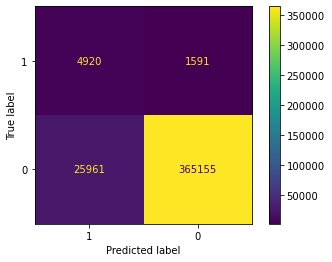

In [10]:
outputs = True
lr_predicted = lr_pipe.predict(X_test)
confusion = confusion_matrix(y_test, lr_predicted, labels = [1,0])
if outputs:
    print('Log Regression (best model)\n', confusion)
cm_display = ConfusionMatrixDisplay(confusion, display_labels=[1,0])
if outputs:
    cm_display.plot()
    
    

In [11]:
print(classification_report(y_test, lr_predicted))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96    391116
           1       0.16      0.76      0.26      6511

    accuracy                           0.93    397627
   macro avg       0.58      0.84      0.61    397627
weighted avg       0.98      0.93      0.95    397627



In [12]:
print(lr_pipe.best_params_)
print(lr_pipe.best_score_)

{'clf__C': 0.5, 'clf__class_weight': None, 'clf__solver': 'lbfgs'}
0.7571162005097787
